# Traffic Data Analysis for Maslak Area

This notebook guides you through analyzing traffic data from the Maslak area using the IBB API. You will perform data fetching, filtering, calculations, visualizations, and statistical analysis as part of the homework.

---

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json

## **Part 1: Retrieve Traffic Data from the IBB API**

In this section, you will write a function to fetch traffic data of September 2024 from the IBB API for the Maslak area based on geohashes.
https://data.ibb.gov.tr/dataset/hourly-traffic-density-data-set/resource/914cb0b9-d941-4408-98eb-f378519c26f4

- Write a function to retrieve traffic data using the `requests` library.
- Store the data in a pandas DataFrame.
- Be careful about the data fetch limit of the API (limit = 500).
- Do not use solutions such as giving manual offsets etc. It means that your codes should also work  with different geohash lists. 

In [4]:
geohash_value = "sxk9u7"
resource_id = '914cb0b9-d941-4408-98eb-f378519c26f4' 

# Function to retrieve data from the IBB API and return it as a DataFrame
def get_maslak_traffic_data(resource_id, geohash_value, limit=500):
    """
    Parameters:
        resource_id: Resource ID for the API, found in IBB API documentation
        geohash_value: GEOHASH value for the specific area (Maslak in this case)
        limit: Maximum number of records per API call (default is 500)
        
    Returns:
        A pandas DataFrame with traffic data for the specified geohash
    """
    url = 'https://data.ibb.gov.tr/api/3/action/datastore_search'
    all_data = []
    initial = 0
    while True:
        # Parameters of API
        parameters = {
            'resource_id': resource_id,
            'limit': limit,
            'offset': initial,
            'filters': f'{{"GEOHASH": "{geohash_value}"}}'
        }
        response = requests.get(url, params=parameters) 
        if(response.status_code == 200): #it will work if response is successful
            
            # convert response to json format
            data = response.json()
            values = data['result']['records']
            if not values:  # Stop if no more data
                break
            
            all_data.extend(values) #values are appended to all_data
            initial = initial + limit #increse offset value
        
        else:
            print(f"ERROR: {response.status_code}")
            break
    
    # Convert the collected data to a DataFrame
    df = pd.DataFrame(all_data)
    
    
    return df

# Fetch traffic data for Maslak
df = get_maslak_traffic_data(resource_id, geohash_value)
print(df)

         _id            DATE_TIME         LONGITUDE          LATITUDE GEOHASH  \
0    1633902  2024-09-29 13:00:00  29.0203857421875  41.1080932617188  sxk9u7   
1    1637146  2024-09-29 14:00:00  29.0203857421875  41.1080932617188  sxk9u7   
2    1638474  2024-09-29 15:00:00  29.0203857421875  41.1080932617188  sxk9u7   
3    1641085  2024-09-29 16:00:00  29.0203857421875  41.1080932617188  sxk9u7   
4    1643389  2024-09-29 17:00:00  29.0203857421875  41.1080932617188  sxk9u7   
..       ...                  ...               ...               ...     ...   
715  1222954  2024-09-22 09:00:00  29.0203857421875  41.1080932617188  sxk9u7   
716  1226921  2024-09-22 10:00:00  29.0203857421875  41.1080932617188  sxk9u7   
717  1230745  2024-09-22 12:00:00  29.0203857421875  41.1080932617188  sxk9u7   
718  1363933  2024-09-24 20:00:00  29.0203857421875  41.1080932617188  sxk9u7   
719  1375047  2024-09-25 00:00:00  29.0203857421875  41.1080932617188  sxk9u7   

    MINIMUM_SPEED MAXIMUM_S

In [5]:
df = get_maslak_traffic_data(resource_id=resource_id, geohash_value=geohash_value)

In [6]:
print("Check number of rows: ", df.shape[0] == 720)

Check number of rows:  True


# Part 2: Calculate Traffic Density

In this section, you will calculate the traffic density based on the number of vehicles and average speed for each row of data. 
- Calculate traffic density using the formula:
$$
\text{Traffic Density} = \frac{\text{number of vehicles}}{\text{average speed}^2}
$$
 - Add a new column to the DataFrame called `traffic_density`.
- All the data types should be numeric.

In [7]:
df['NUMBER_OF_VEHICLES'] = pd.to_numeric(df['NUMBER_OF_VEHICLES']) #make NUMBER_OF_VEHICLE column numeric so that they can be made mathematical operations
df['AVERAGE_SPEED'] = pd.to_numeric(df['AVERAGE_SPEED']) #make AVERAGE_SPEED column numeric so that they can be made mathematical operations

df['TRAFFIC_DENSITY'] = df['NUMBER_OF_VEHICLES'] / (df['AVERAGE_SPEED'] * df['AVERAGE_SPEED'])# Calculate traffic density and point out it as a new column

# Show the result
print(df)


         _id            DATE_TIME         LONGITUDE          LATITUDE GEOHASH  \
0    1222327  2024-09-22 08:00:00  29.0203857421875  41.1080932617188  sxk9u7   
1    1222954  2024-09-22 09:00:00  29.0203857421875  41.1080932617188  sxk9u7   
2    1226921  2024-09-22 10:00:00  29.0203857421875  41.1080932617188  sxk9u7   
3    1228415  2024-09-22 11:00:00  29.0203857421875  41.1080932617188  sxk9u7   
4    1230745  2024-09-22 12:00:00  29.0203857421875  41.1080932617188  sxk9u7   
..       ...                  ...               ...               ...     ...   
715   747184  2024-09-14 01:00:00  29.0203857421875  41.1080932617188  sxk9u7   
716   757048  2024-09-14 05:00:00  29.0203857421875  41.1080932617188  sxk9u7   
717   766558  2024-09-14 09:00:00  29.0203857421875  41.1080932617188  sxk9u7   
718   780475  2024-09-14 15:00:00  29.0203857421875  41.1080932617188  sxk9u7   
719   785194  2024-09-14 17:00:00  29.0203857421875  41.1080932617188  sxk9u7   

    MINIMUM_SPEED MAXIMUM_S

# Part 3: Find Hourly Traffic Density and Average Speed

Here, you will analyze the traffic data by hour of the day. The final goal is to visualize how traffic density throughout the day.

- Group the data by hour and calculate the average traffic density and average traffic speed for each hour.
- To do that, you should extract the hour of the day from the `DATE_TIME` column. You can use pandas functions.

In [9]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME']) #turn objects in DATE_TIME column into date and time format
df['HOUR'] = df['DATE_TIME'].dt.hour # extract hour to use from DATE_TINE column and point out is as a new column

#Create a new dataframe which it makes groups for each hour to calculate average values
hourly_data = df.groupby('HOUR').agg({
    'TRAFFIC_DENSITY': 'mean',
    'AVERAGE_SPEED': 'mean'
}).reset_index()

# Print the new data frame called as hourly_data(new data frame)
print(hourly_data)


    HOUR  TRAFFIC_DENSITY  AVERAGE_SPEED
0      0         0.030889      58.933333
1      1         0.017608      62.448276
2      2         0.009532      64.366667
3      3         0.006249      65.633333
4      4         0.007672      65.333333
5      5         0.017328      63.103448
6      6         0.058354      59.419355
7      7         0.159812      51.500000
8      8         0.273900      41.965517
9      9         0.218297      41.787879
10    10         0.135685      47.821429
11    11         0.122128      49.312500
12    12         0.132208      47.448276
13    13         0.136841      45.727273
14    14         0.160033      42.379310
15    15         0.382308      31.406250
16    16         0.470951      29.193548
17    17         0.382716      28.750000
18    18         0.382549      27.068966
19    19         0.325203      27.935484
20    20         0.127250      42.214286
21    21         0.068829      51.466667
22    22         0.054125      53.866667
23    23        

# Part 4: Plot Hourly Traffic Density
In this section, you will interpret the relation between the traffic density and average speed for each hour of the day using a bar and line chart.
You are also required to customize the bar colors based on their values compared to the average traffic density.

Plot the hourly traffic intensity as a bar chart:
- If a bar represents an hour with above-average traffic density, color it red.
- If a bar represents an hour with below-average or equal-to-average traffic density, color it blue.
- If a bar's traffic density is within 10% of the average density (i.e., very close to the average), color it orange to highlight near-average behavior. (threshold = average density * 0.10)
- Add a blue line plot to represent the average traffic speed for each hour.
- Label the axes and title the plot to clearly show the relationship between the hour of the day and traffic density.
- The expected output is as follows:

<img src="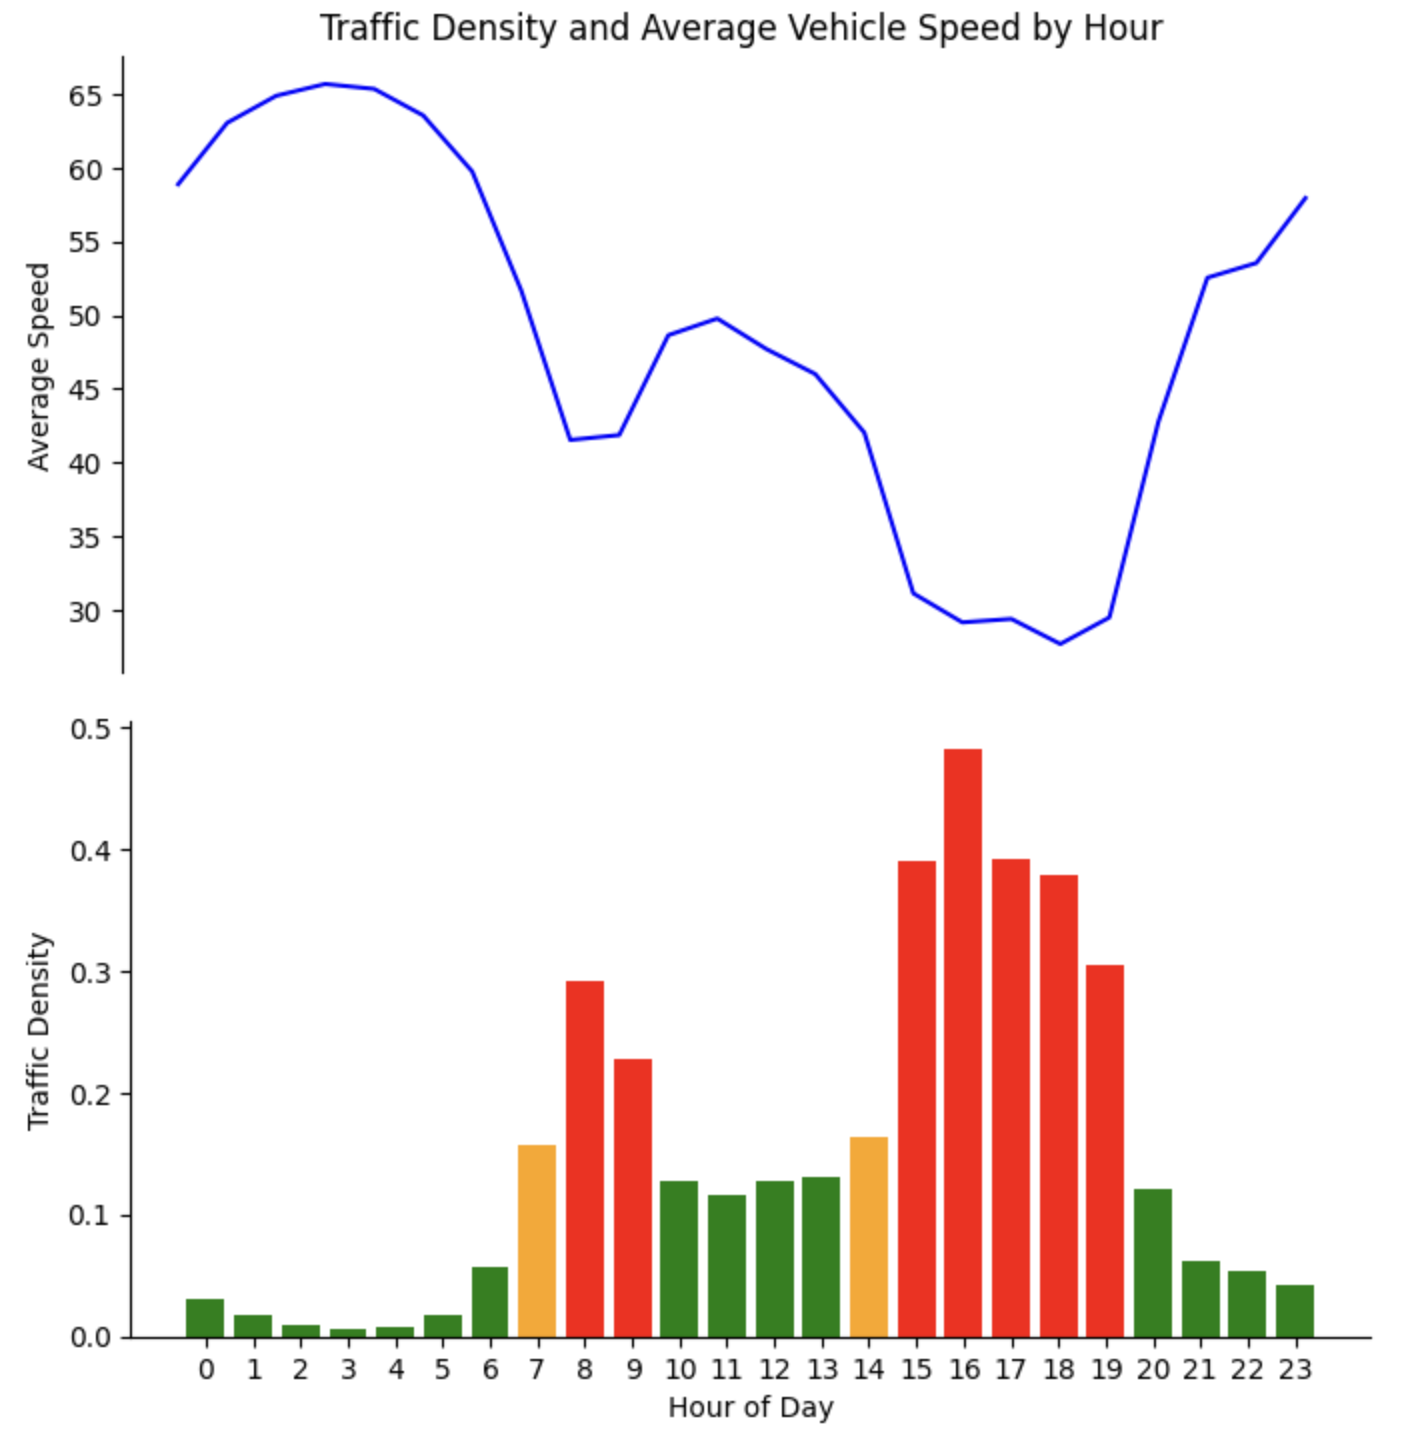
" alt="Traffic Density Plot" width="600" height="400"/> 




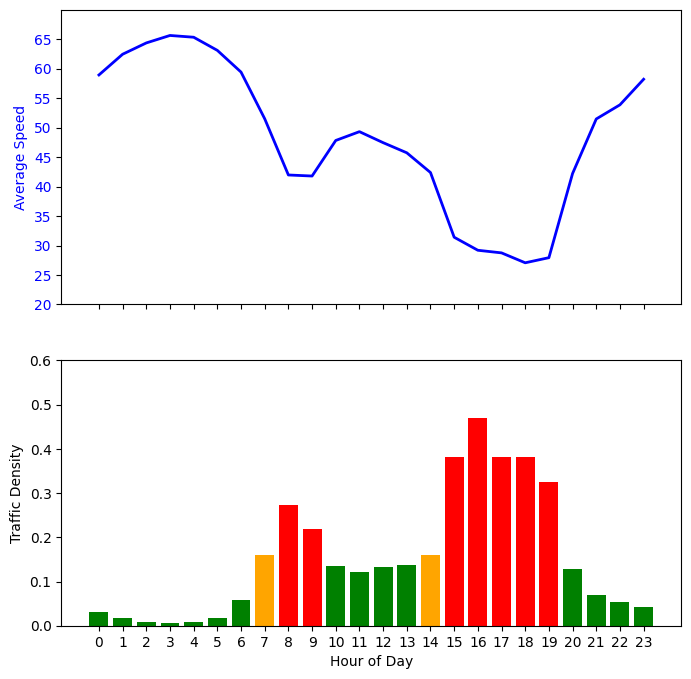

In [10]:
# Calculate the average traffic density and threshold for color coding
avg_traffic_density = hourly_data['TRAFFIC_DENSITY'].mean()
threshold = avg_traffic_density * 0.10

# Define colors based on traffic density values
colors = []
for density in hourly_data['TRAFFIC_DENSITY']:
    if abs(density - avg_traffic_density) <= threshold:
        colors.append('orange')
    elif density<=avg_traffic_density:
        colors.append("green")
    elif density > avg_traffic_density:
        colors.append('red')
# Plot traffic density as bars with color coding

# Create a figure with two subplots sharing the same x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8), gridspec_kw={'height_ratios': [1, 0.9]})

# Plot traffic density as a bar chart with custom colors in the lower subplot (ax2)
ax2.bar(hourly_data['HOUR'], hourly_data['TRAFFIC_DENSITY'], color=colors)
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Traffic Density')
ax2.set_ylim(0, 0.6)  # Adjust the y-axis limit as per the shared image
ax1.set_xticks(range(0, 24, 1))
# Plot average speed as a line chart in the upper subplot (ax1)
ax1.plot(hourly_data['HOUR'], hourly_data['AVERAGE_SPEED'], color='blue', linewidth=2)
ax1.set_ylabel('Average Speed', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(20, 70)  # Adjust the y-axis limit as per the shared image
ax1.set_yticks(range(20, 70, 5))

# Show the plot
plt.show()